In [2]:
library(fpp2)
library(tseries)
library(gridExtra)

In [3]:
data(euretail)
str(euretail)

 Time-Series [1:64] from 1996 to 2012: 89.1 89.5 89.9 90.1 89.2 ...


In [4]:
# (a) euretail 자료에 단위근이 존재하는지 adf.test()를 이용하여 테스트하라.
# https://freshrimpsushi.tistory.com/921

adf.test(euretail)
adf.test(diff(euretail))
adf.test(diff(diff(euretail)))
# 디키-풀러 테스트에서 데이터가 정상성을 가진다는 것은 어디까지나 평균이 일정하다는 의미이다.
# 완전한 정상성 자체를 보장하는 것이 아니다.

Warning message in adf.test(euretail):
"p-value greater than printed p-value"


	Augmented Dickey-Fuller Test

data:  euretail
Dickey-Fuller = -0.17892, Lag order = 3, p-value = 0.99
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(euretail)
Dickey-Fuller = -2.6645, Lag order = 3, p-value = 0.3058
alternative hypothesis: stationary


Warning message in adf.test(diff(diff(euretail))):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(diff(euretail))
Dickey-Fuller = -5.204, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


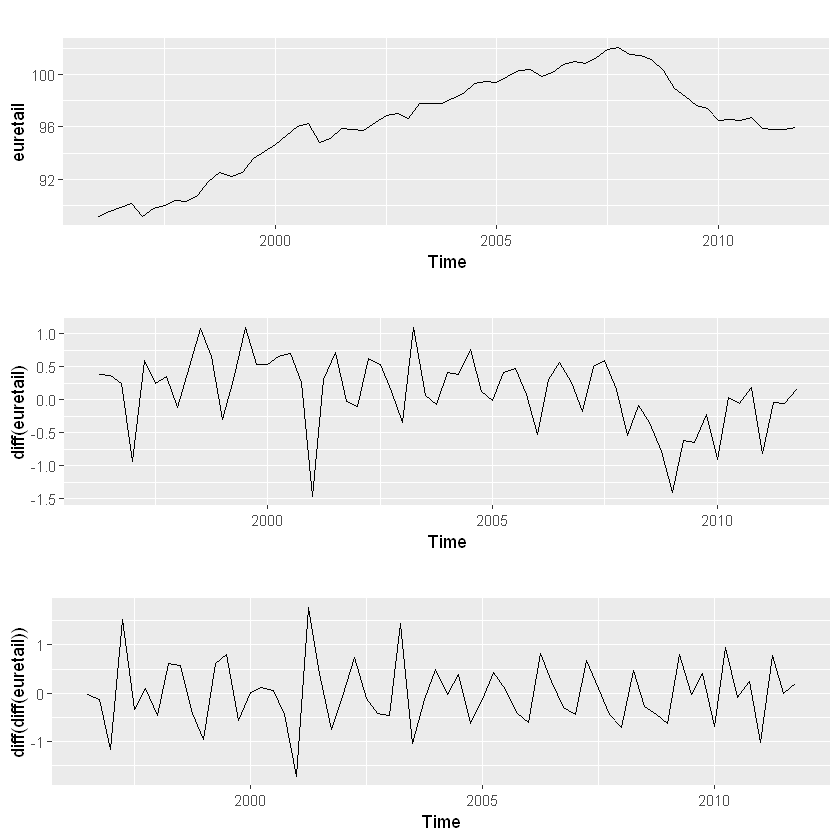

In [5]:
p1 <- autoplot(euretail)
p2 <- autoplot(diff(euretail))
p3 <- autoplot(diff(diff(euretail)))

grid.arrange(p1, p2, p3,
    layout_matrix = rbind(
        c(1),
        c(2),
        c(3)))

In [8]:
# (b) euretail 자료를 (i) decompose 방법, (ii) Holt-Winters 방법, (iii) ARIMA 방법으로 적합하라.
# 각 방법에 따른 적합치 (fitted value) 및 잔차 (random 혹은 residual)에 대한 그림을 그려라.
# ARIMA 모형의 경우 가장 적절한 모형의 차수를 선택하라. 

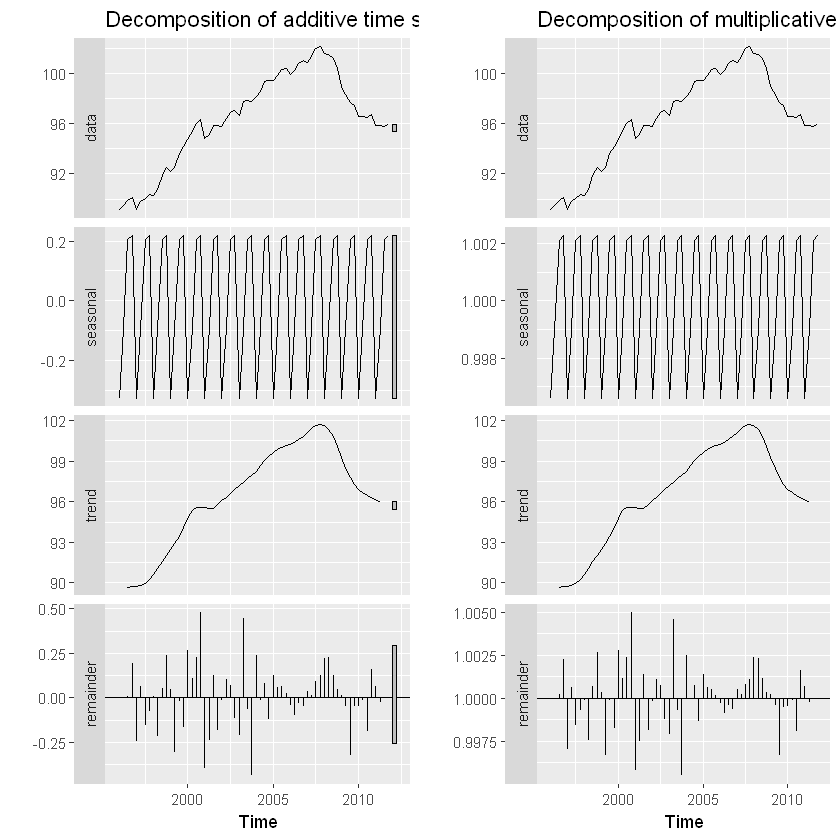

In [11]:
# (i) decompose 방법
fit_decom_add <- decompose(euretail, type = 'additive')
fit_decom_mul <- decompose(euretail, type = 'multiplicative')

p1 <- autoplot(fit_decom_add)
p2 <- autoplot(fit_decom_mul)

grid.arrange(p1, p2,
    layout_matrix = rbind(
        c(1, 2)))

Warning message:
"Removed 4 rows containing missing values (geom_path)."Warning message:
"Removed 4 rows containing missing values (geom_path)."

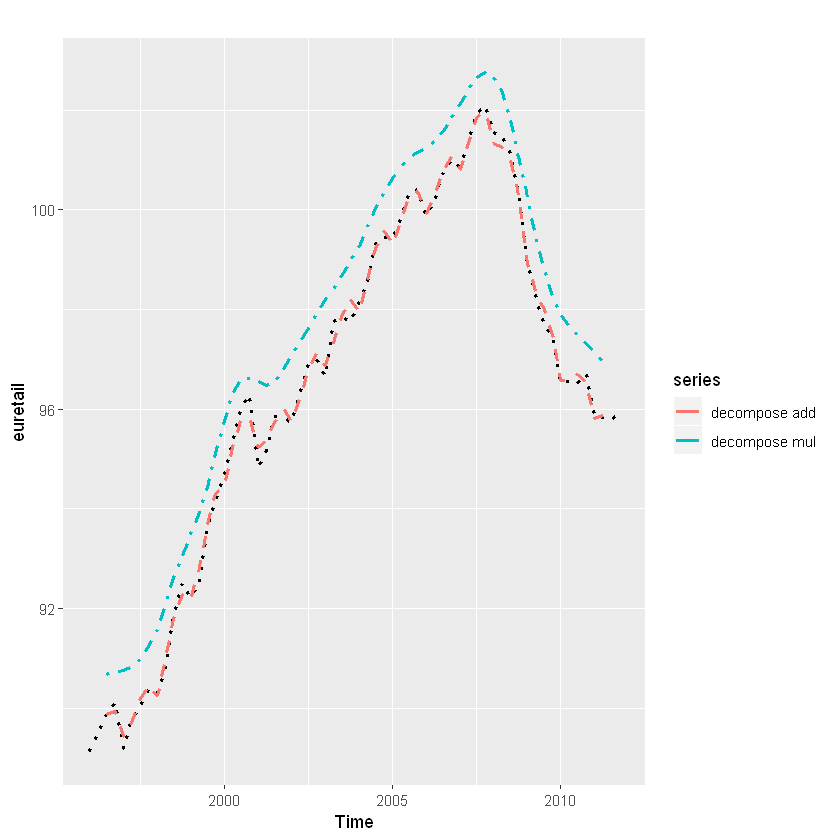

In [36]:
autoplot(euretail, linetype = 'dotted', size = 1) +
    autolayer(fit_decom_add$seasonal + fit_decom_add$trend
              , series = "decompose add", linetype = 'dashed', size = 1) +
    autolayer(fit_decom_mul$seasonal + fit_decom_mul$trend
              , series = "decompose mul", linetype = 'dotdash', size = 1)

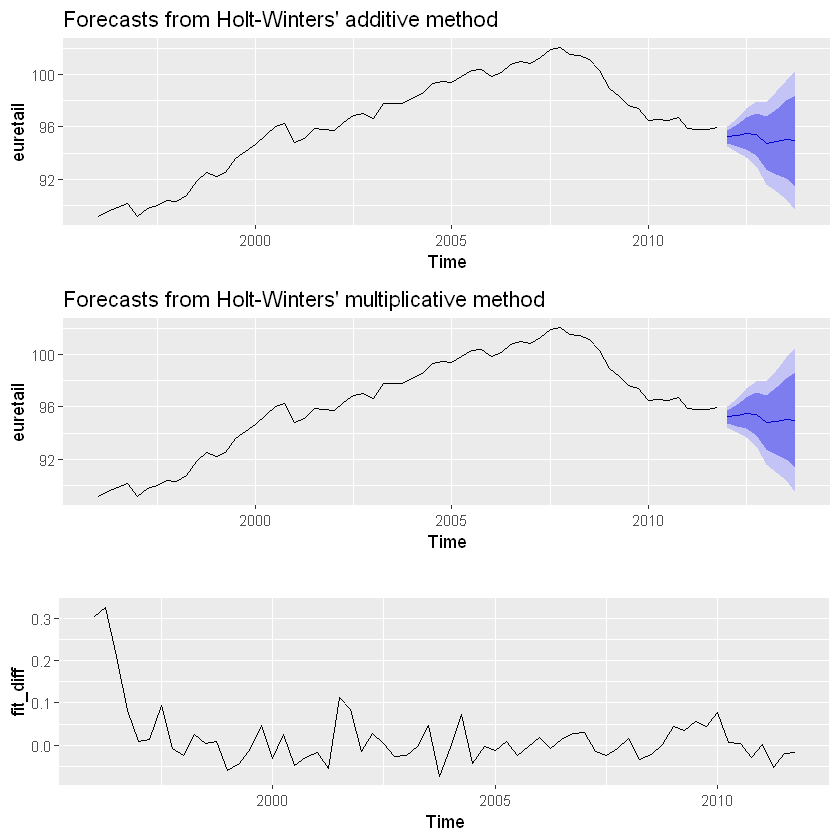

In [12]:
# (ii) Holt-Winters 방법,
fit_hw_add <- hw(euretail, seasonal = "additive")
p1 <- autoplot(fit_hw_add)

fit_hw_mul <- hw(euretail, seasonal = "multiplicative")
p2 <- autoplot(fit_hw_mul)

fit_diff <- fit_hw_add$fitted  - fit_hw_mul$fitted
p3 <- autoplot(fit_diff)


grid.arrange(p1, p2, p3,
    layout_matrix = rbind(
        c(1),
        c(2),
        c(3)))

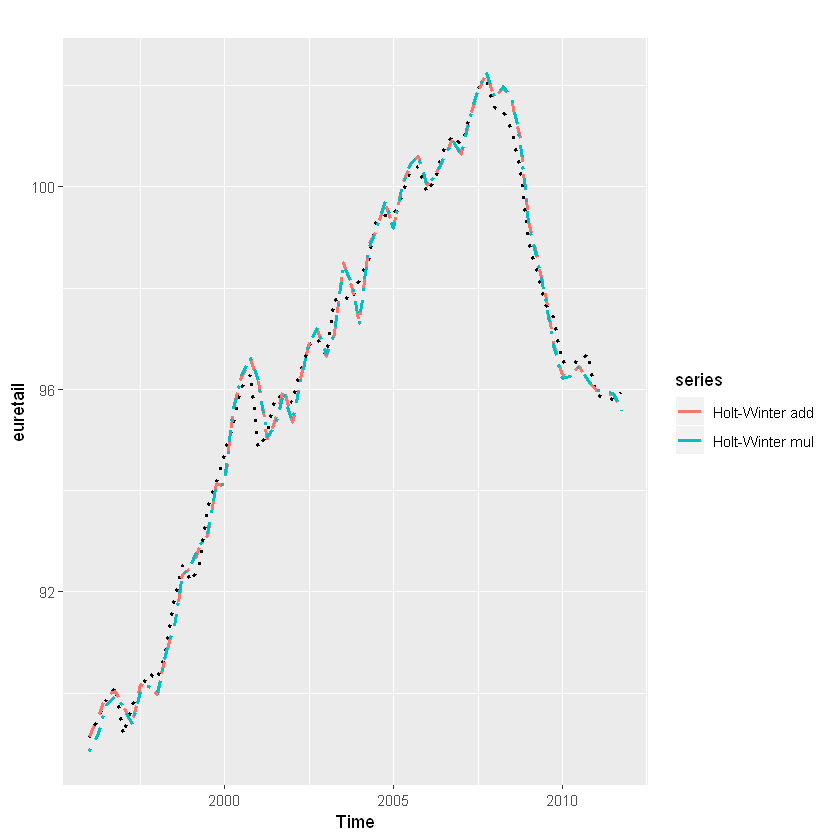

In [37]:
autoplot(euretail, linetype = 'dotted', size = 1) +
    autolayer(fit_hw_add$fitted, series = "Holt-Winter add"
              , linetype = 'dashed', size = 1) +
    autolayer(fit_hw_mul$fitted, series = "Holt-Winter mul"
              , linetype = 'dotdash', size = 1)

In [13]:
# (iii) ARIMA 방법으로 적합하라.
fit_auto.arima <- auto.arima(euretail)
fit_auto.arima

Series: euretail 
ARIMA(0,1,3)(0,1,1)[4] 

Coefficients:
         ma1     ma2     ma3     sma1
      0.2630  0.3694  0.4200  -0.6636
s.e.  0.1237  0.1255  0.1294   0.1545

sigma^2 estimated as 0.156:  log likelihood=-28.63
AIC=67.26   AICc=68.39   BIC=77.65

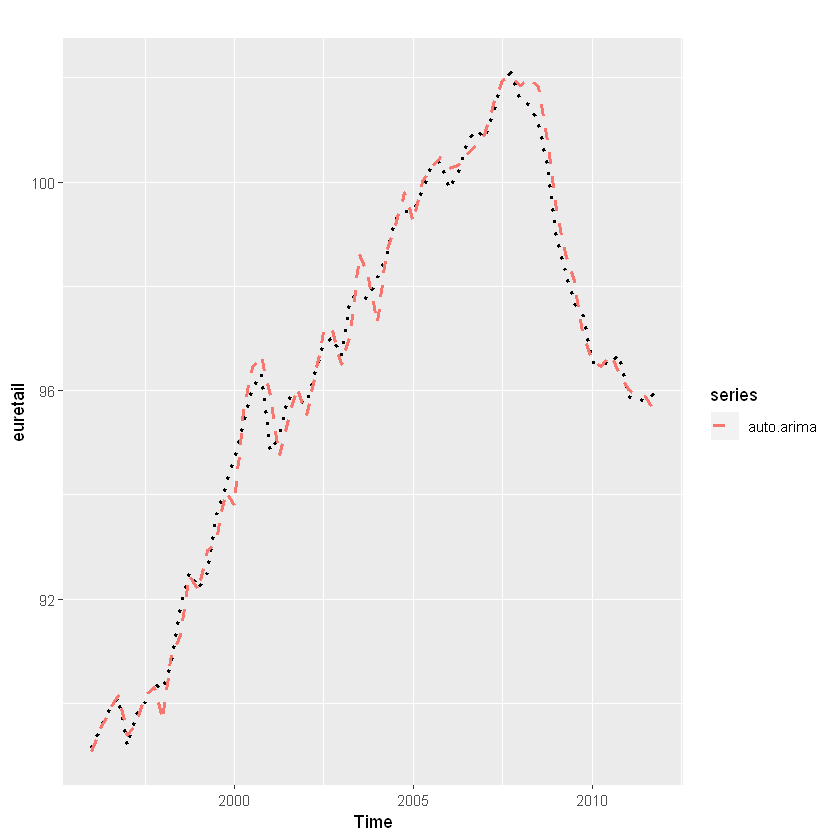

In [39]:
autoplot(euretail, linetype = 'dotted', size = 1) +
    autolayer(fit_auto.arima$fitted, series = "auto.arima"
              , linetype = 'dashed', size = 1)

Warning message:
"Removed 4 rows containing non-finite values (stat_bin)."

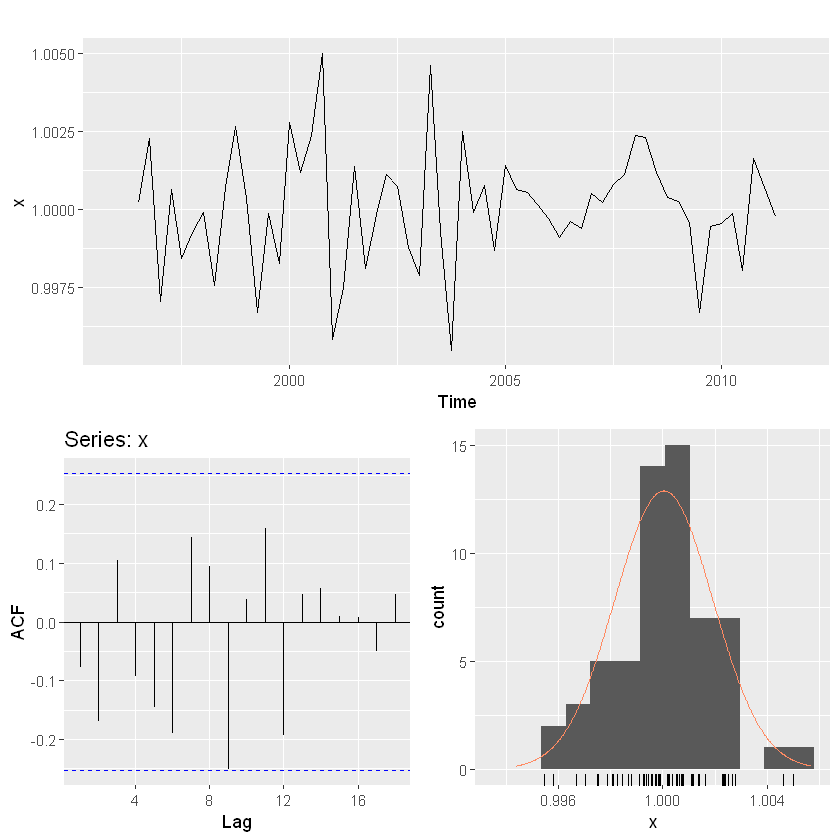

In [15]:
# 잔차 (random 혹은 residual)에 대한 그림을 그려라.

x <- fit_decom_mul$random
p1 <- autoplot(x)
p2 <- gghistogram(x, add.normal = TRUE)
p3 <- ggAcf(x)

grid.arrange(p1, p2, p3,
    layout_matrix = rbind(
        c(1, 1),
        c(3, 2)))


	Ljung-Box test

data:  Residuals from Holt-Winters' multiplicative method
Q* = 9.2378, df = 3, p-value = 0.02629

Model df: 8.   Total lags used: 11



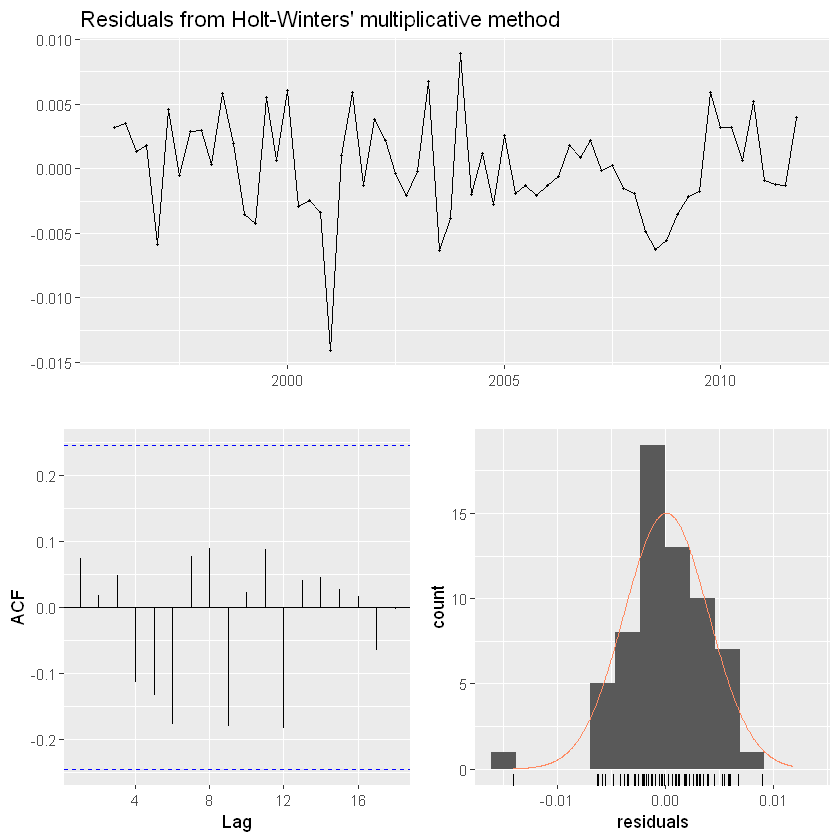

In [16]:
checkresiduals(fit_hw_mul)


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)(0,1,1)[4]
Q* = 0.51128, df = 4, p-value = 0.9724

Model df: 4.   Total lags used: 8



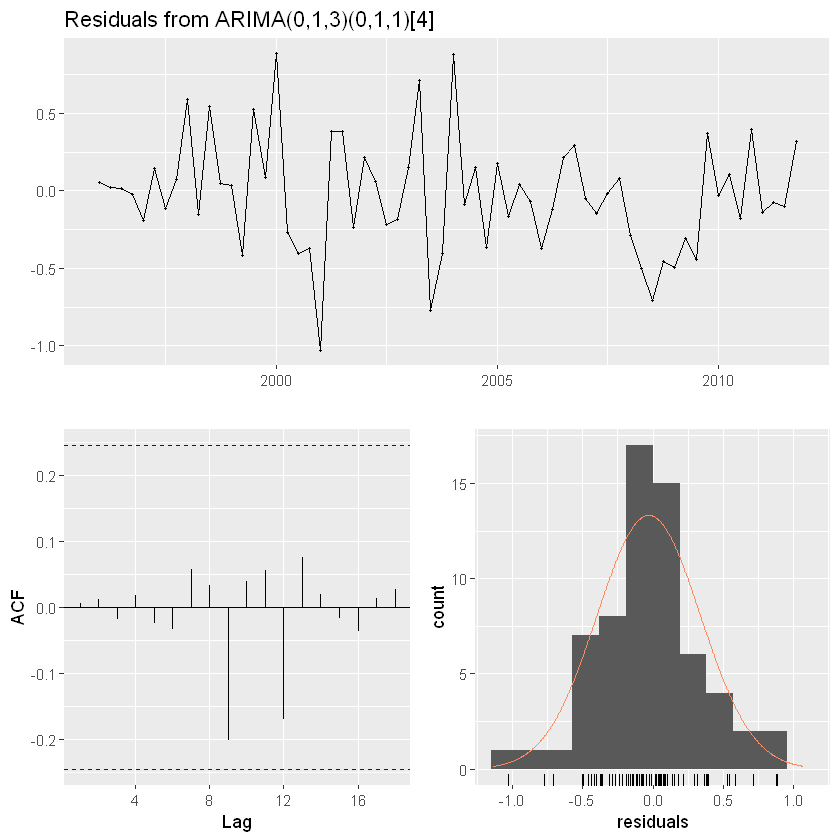

In [18]:
checkresiduals(fit_auto.arima)

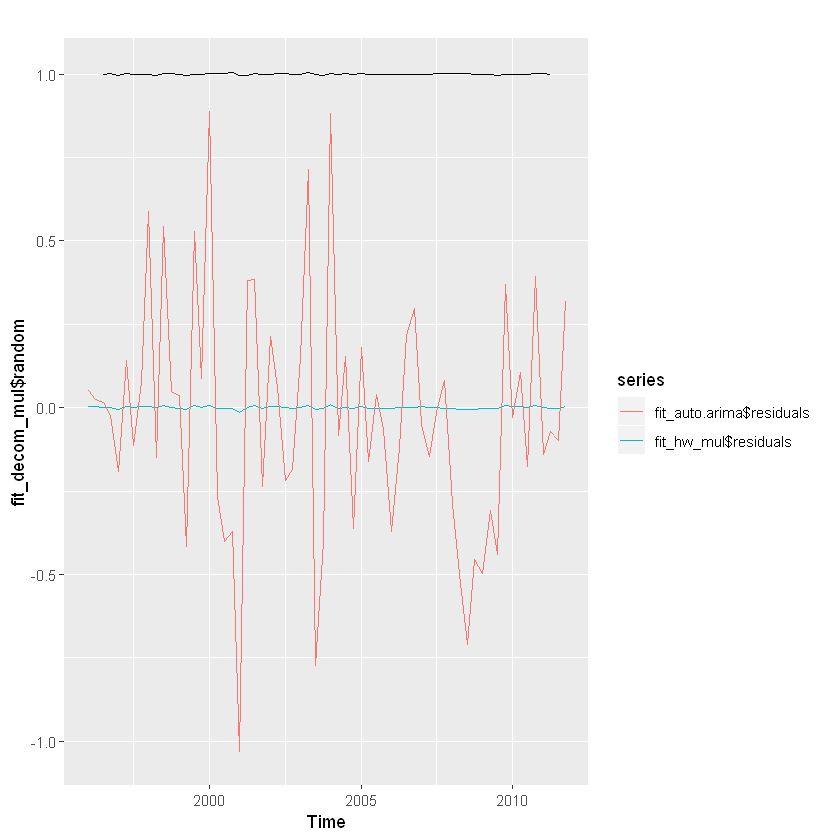

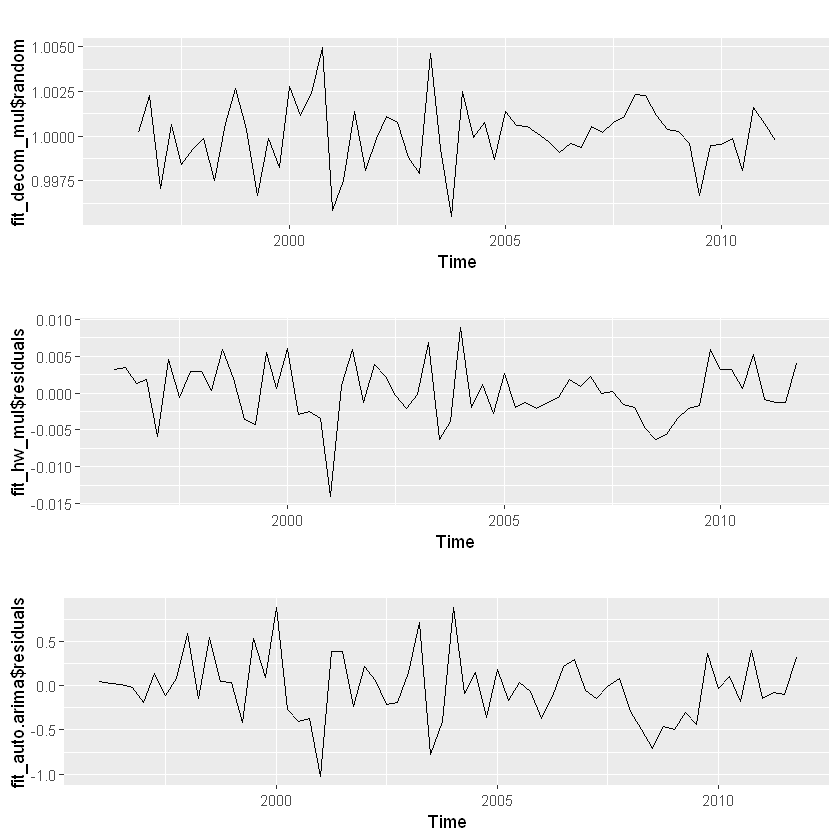

In [19]:
autoplot(fit_decom_mul$random) + 
    autolayer(fit_hw_mul$residuals) + 
    autolayer(fit_auto.arima$residuals)

p1 <- autoplot(fit_decom_mul$random)
p2 <- autoplot(fit_hw_mul$residuals)
p3 <- autoplot(fit_auto.arima$residuals)

grid.arrange(p1, p2, p3,
    layout_matrix = rbind(
        c(1),
        c(2),
        c(3)))

In [108]:
# (c) 잔차들의 제곱의 합, 즉 sum(잔차^2)을 계산하고 어떤 모형이 주어진 자료를 가장 잘 설명하는 모형을
# 선택하고 이 모형의 잔차에 대한 ACF 및 PACF 를 그리고 문제가 있는지 기술하라.

In [20]:
print(sum(as.numeric((fit_decom_add$random)^2), na.rm = TRUE))
print(sum(as.numeric((fit_decom_mul$random)^2), na.rm = TRUE))
print(sum(as.numeric((fit_hw_add$residual)^2)))
print(sum(as.numeric((fit_hw_mul$residual)^2)))
print(sum(as.numeric((fit_auto.arima$residuals)^2)))

[1] 1.890584
[1] 60.0049
[1] 8.559267
[1] 0.0009649783
[1] 8.578559


In [22]:
print(sum(as.numeric((fit_decom_add$random)^2), na.rm = TRUE))
print(sum(as.numeric((fit_decom_mul$random)^2), na.rm = TRUE))
print(sum(as.numeric((fit_hw_add$residual)^2)))
print(sum(as.numeric((fit_hw_mul$residual)^2)))
print(sum(as.numeric((fit_auto.arima$residuals)^2)))

[1] 1.890584
[1] 60.0049
[1] 8.559267
[1] 0.0009649783
[1] 8.578559


In [134]:
print(fit_decom_mul$random)

          Qtr1      Qtr2      Qtr3      Qtr4
1996        NA        NA 1.0002235 1.0022679
1997 0.9970469 1.0006328 0.9984410 0.9992698
1998 0.9998883 0.9975469 1.0006920 1.0026531
1999 1.0003545 0.9966859 0.9998623 0.9982648
2000 1.0027709 1.0011656 1.0023745 1.0049872
2001 0.9958195 0.9974958 1.0013599 0.9980987
2002 0.9998425 1.0010989 1.0007398 0.9987892
2003 0.9978838 1.0046045 0.9993038 0.9954806
2004 1.0024882 0.9999043 1.0007585 0.9986748
2005 1.0014059 1.0006192 1.0005420 1.0001612
2006 0.9997169 0.9990879 0.9995980 0.9993777
2007 1.0005183 1.0002177 1.0007827 1.0011154
2008 1.0023595 1.0023037 1.0011658 1.0003626
2009 1.0002479 0.9995715 0.9966875 0.9994647
2010 0.9995497 0.9998818 0.9980546 1.0016183
2011 1.0006931 0.9997693        NA        NA


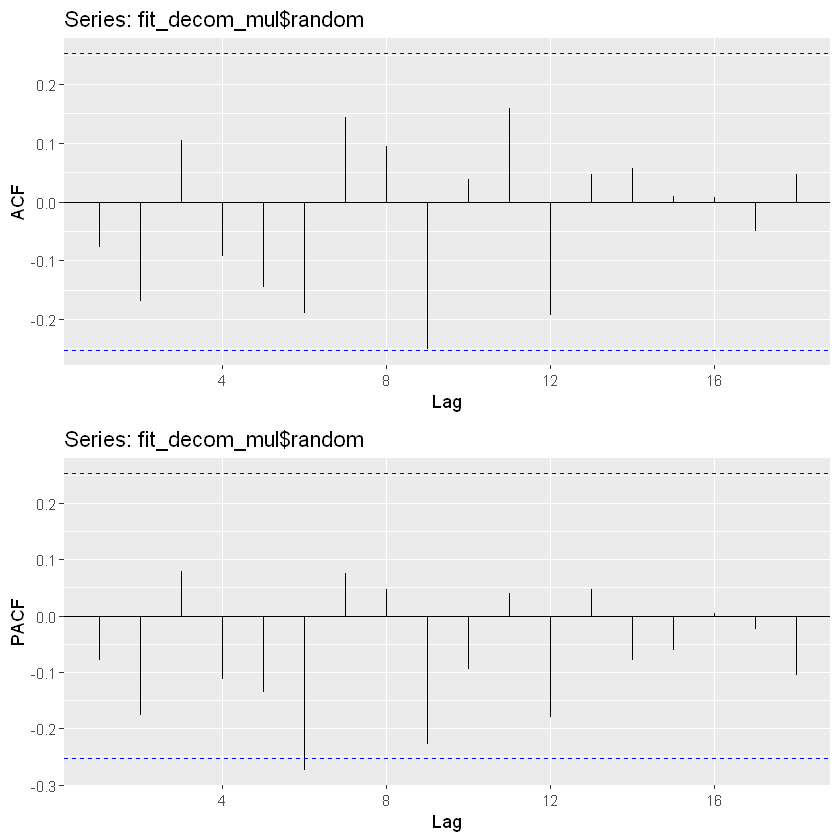

In [109]:
p1 <- ggAcf(fit_decom_mul$random, type = c("correlation"))
p2 <- ggPacf(fit_decom_mul$random)
grid.arrange(p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2)))

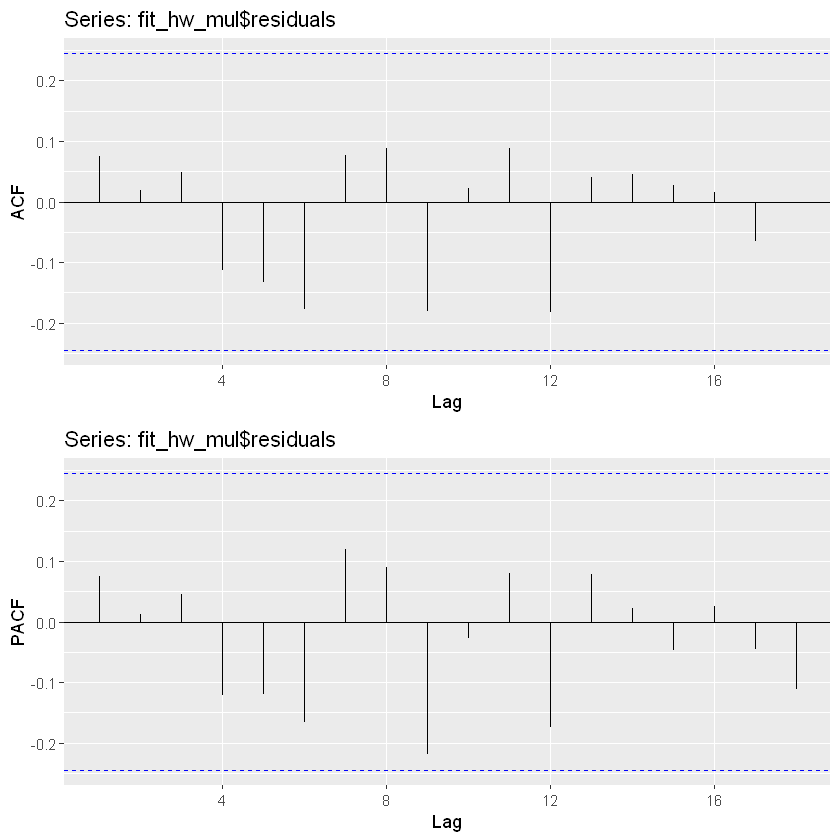

In [111]:
p1 <- ggAcf(fit_hw_mul$residuals, type = c("correlation"))
p2 <- ggPacf(fit_hw_mul$residuals)
grid.arrange(p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2)))

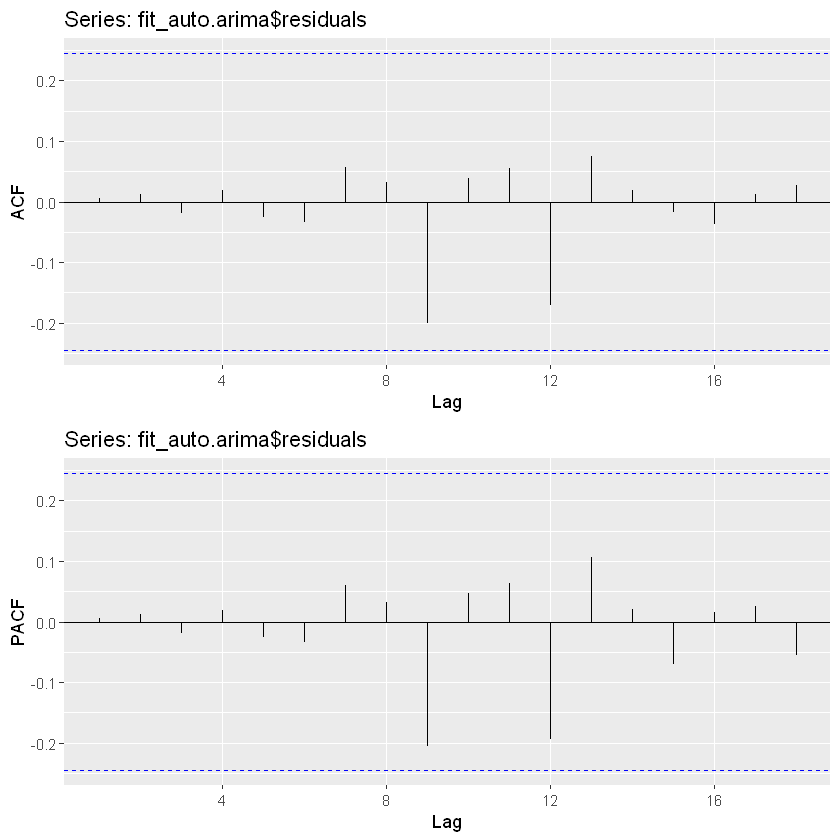

In [112]:
p1 <- ggAcf(fit_auto.arima$residuals, type = c("correlation"))
p2 <- ggPacf(fit_auto.arima$residuals)
grid.arrange(p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2)))